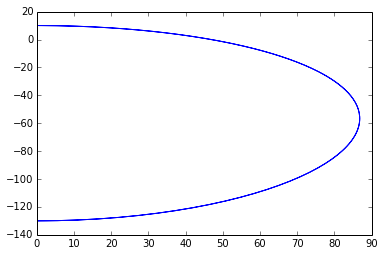

In [1]:
#!/usr/bin/python 

# Code to map the rotational phase a pulsar, given the geometry of the pulsar. 
# Input angles are the inclination angle, the impact parameter, and the
# polarisation position angle phi. The function takes input angle in degrees and
# return an angle R in radians, which in turn used to calculate the x and y 
# coordinates of the plane of rotation 

import numpy as np
import d2r
import matplotlib.pyplot as plt
%matplotlib inline

def mapphi(alpha,beta,phi):
    """
    Function to map the rotational phase phi on t.
     
    Args:
    -----
 
        alpha   : inclination angle of the magnetic axis from the rotational axis in degrees. 
        beta    : impact parameter in degrees (the closest approach of the magnetic axis to the LOS).
        phi     : rotational phase in degrees.

    Returns:
    --------

        The coordinates of the plane of rotation xp and yp; both the size of phi.

    """

    cosR = d2r.cosD(alpha+beta) * d2r.cosD(alpha) + \
           d2r.sinD(alpha+beta) * d2r.sinD(alpha) * d2r.cosD(phi)

    cosR_corr = d2r.correct(cosR)
    R = d2r.acosD(cosR_corr)

    # problems with precision for 180 degrees
    cosgamma = np.zeros(len(R))
    for i in np.arange(len(R)):
        if int(R[i]*100.0) == 1800.0:
            R[i] = int(R[i]*100.0)/100.0
    
        if R[i] != 0.0 and R[i] != 180.0 and alpha > 0.0:
            cosgamma[i] = (d2r.cosD(alpha+beta) - d2r.cosD(alpha) * cosR[i]) \
                  /(d2r.sinD(alpha) * d2r.sinD(R[i]))
        else:
             cosgamma[i] = 0.0

    cosgamma_corr = d2r.correct(cosgamma) 
    gamma = d2r.acosD(cosgamma_corr)
    xp = R * d2r.sinD(gamma) 
    
    
    
    if phi[i] > 0.0:
        xp[i] = xp[i]
    
    yp = -R * cosgamma
    
    return xp, yp 
    #return R, gamma, xp, yp
#############################################
if __name__ == "__main__":
    phi= np.linspace(-180, 180, num=360, endpoint=True)
    alpha = 60
    beta = 10
    xp, yp =  mapphi(alpha, beta, phi)
    plt.plot(xp, yp)
    #print xp, yp